## <b> Problem Statement:

###  Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

###  Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

Attributes Information:

1- State: the US state in which the customer resides, indicated by a two-letter abbreviation

2- Account Length: the number of days that this account has been active

3- Area Code: the three-digit area code of the corresponding customer’s phone number

4- Int’l Plan: whether the customer has an international calling plan: yes/no

5- VMail Plan: whether the customer has a voice mail feature: yes/no

6- VMail Message: presumably the average number of voice mail messages per month

7- Day Mins: the total number of calling minutes used during the day

8- Day Calls: the total number of calls placed during the day

9- Day Charge: the billed cost of daytime calls

10- Eve Mins: the total number of calling minutes used during the evening

11- Eve Calls: the total number of calls placed during the evening

12- Eve Charge: the billed cost of evening time calls

13- Night Mins: the total number of calling minutes used during the night

14- Night Calls: the total number of calls placed during the night

15- Night Charge: the billed cost of nighttime calls

16- Intl Mins: the total number of international minutes

17- Intl Calls: the total number of international calls

18- Intl Charge: the billed cost for international calls

19- CustServ Calls: the number of calls placed to Customer Service

20- Churn: whether the customer left the service: true/false

## 1 : Data Ingestion & Overview Of Data:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_ = pd.read_csv("Telecom Churn.csv")
print("Top 5 rows of data: ")
display(df_.head())

print("Information about the Dataset: ")
display(df_.info())

print("Summary of the Dataset: ")
display(df_.describe())

Top 5 rows of data: 


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Information about the Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total ni

None

Summary of the Dataset: 


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Insights: 
- No missing values in Dataset.

In [26]:
#Checking the dataset is balanced or not:
df_.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Insights: 
- Highly imbalanced dataset.

## 2. Exploratory Data Analysis:

In [118]:
# Count of different Data types:
df_.dtypes.value_counts()

int64      8
float64    8
object     3
bool       1
dtype: int64

In [190]:
# Segregation of features  into different kinds:
features = df_.select_dtypes(exclude="bool")
numeric_features = features.select_dtypes(include="number")
cat_features = features.select_dtypes(include="object")
Target = df_[['Churn']]
display(features.head())
display(numeric_features.head())
display(cat_features.head())
display(Target.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No


,Churn
0,False
1,False
2,False
3,False
4,False


### Univariate Analysis:

In [189]:
# Histogram Analysis:
for feature in numeric_features:
    display(feature + " :",df_[feature].nunique())

'Account length :'

212

'Area code :'

3

'Number vmail messages :'

46

'Total day minutes :'

1667

'Total day calls :'

119

'Total day charge :'

1667

'Total eve minutes :'

1611

'Total eve calls :'

123

'Total eve charge :'

1440

'Total night minutes :'

1591

'Total night calls :'

120

'Total night charge :'

933

'Total intl minutes :'

162

'Total intl calls :'

21

'Total intl charge :'

162

'Customer service calls :'

10

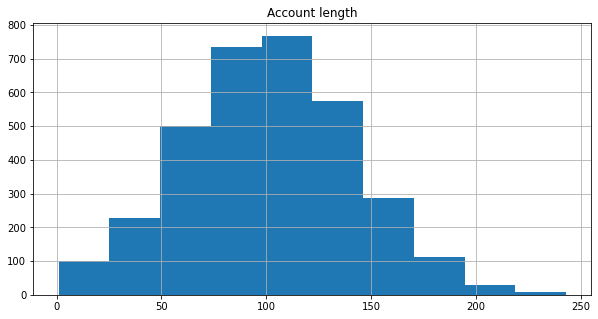

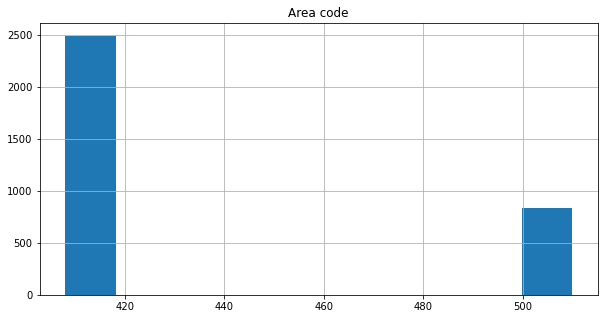

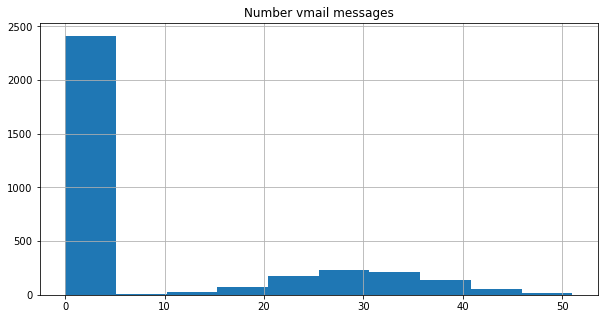

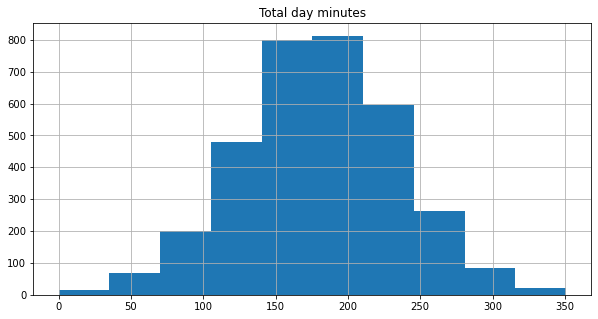

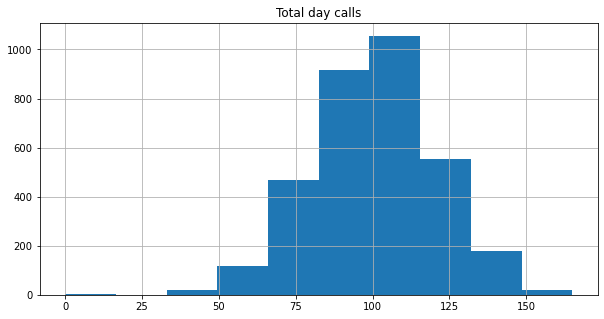

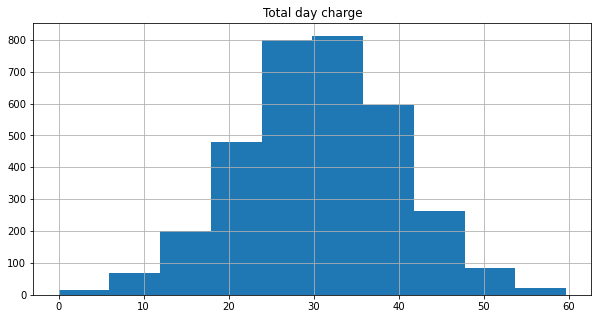

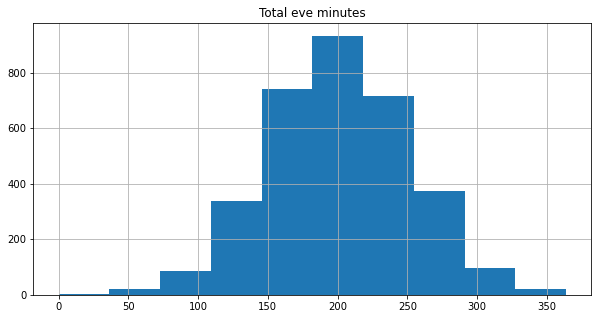

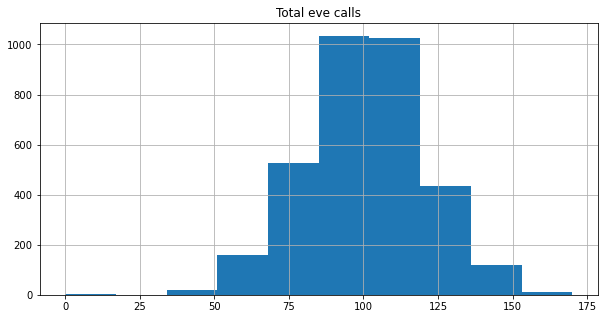

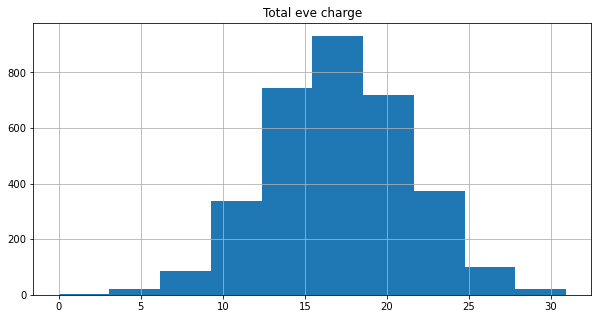

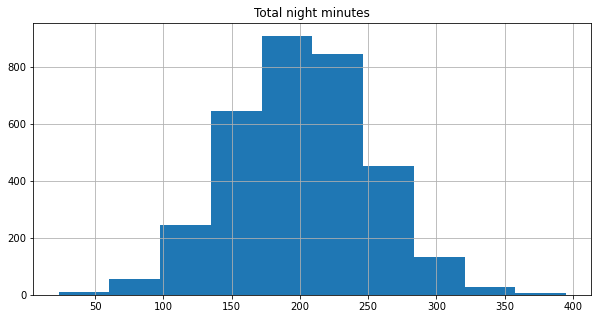

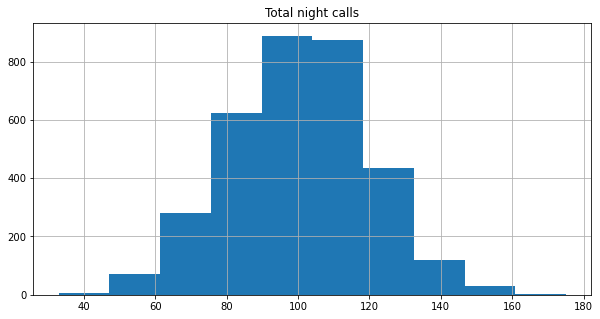

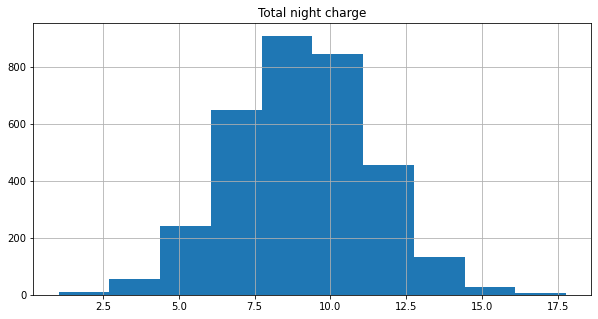

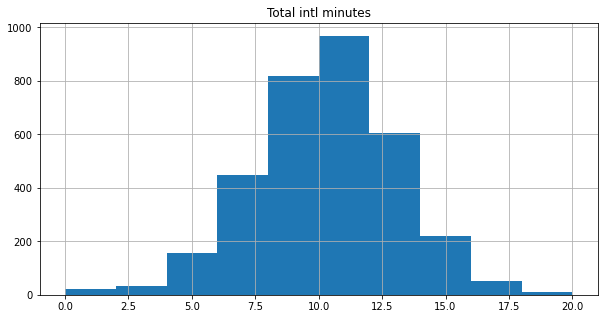

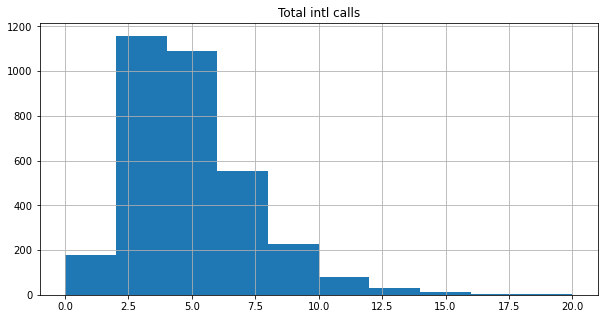

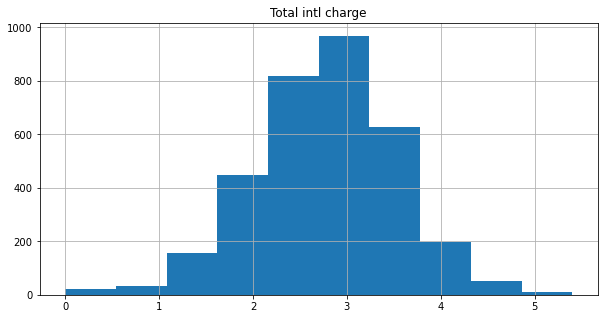

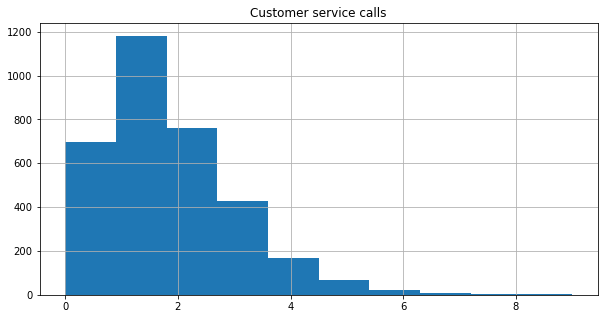

In [182]:
# Histogram Analysis:
for feature in numeric_features:
    figure = plt.figure(figsize=(10,5))
    axis = plt.gca()
    df_.hist(column=[feature],grid =True, ax = axis)

In [198]:
# Percent of Customers Having average number of voice messages per month as zero: 
(df_["Number vmail messages"] == 0).sum() / len(df_["Number vmail messages"])

0.7233723372337234

In [176]:
# Percent of Ex-Customers Having average number of voice messages per month as zero: 
(df_.query("Churn == True")['Number vmail messages'] == 0 ).sum() / len(df_.query("Churn == True")['Number vmail messages'])

0.8343685300207039

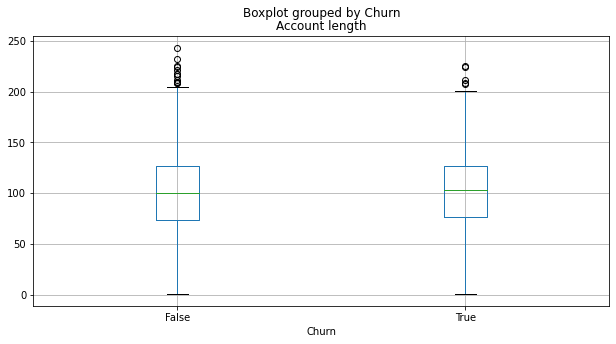

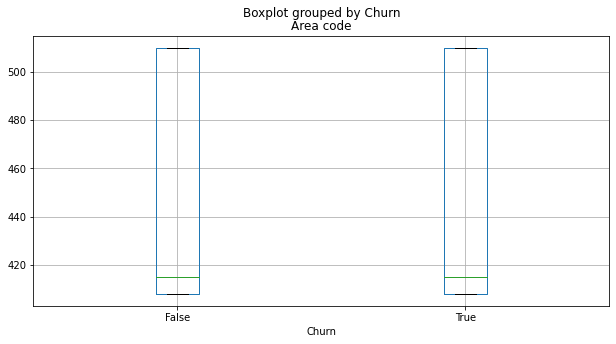

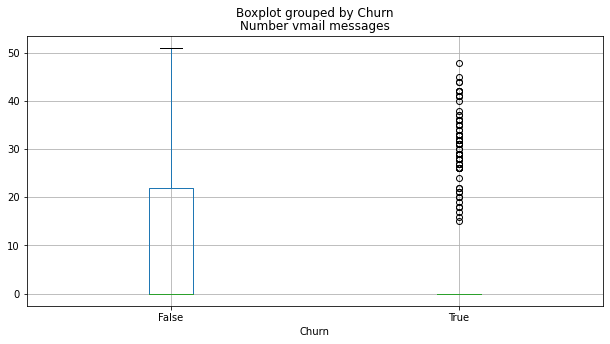

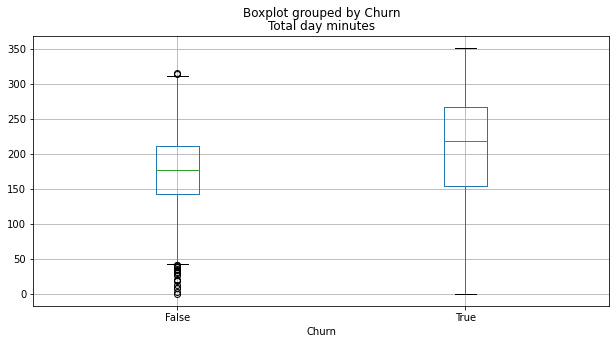

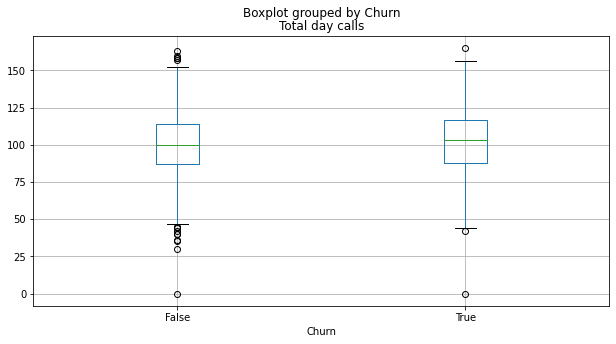

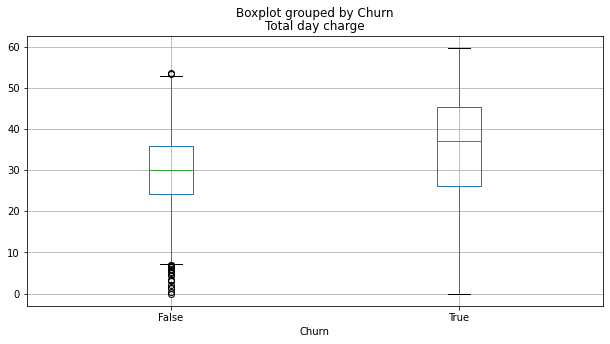

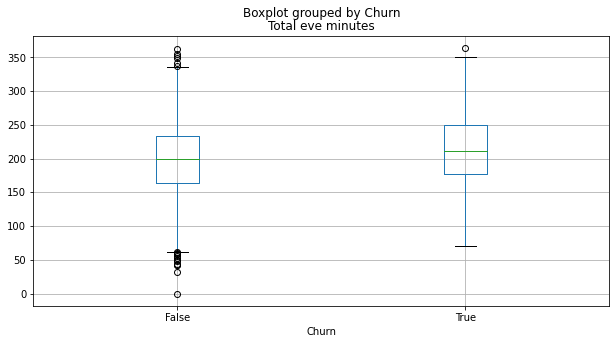

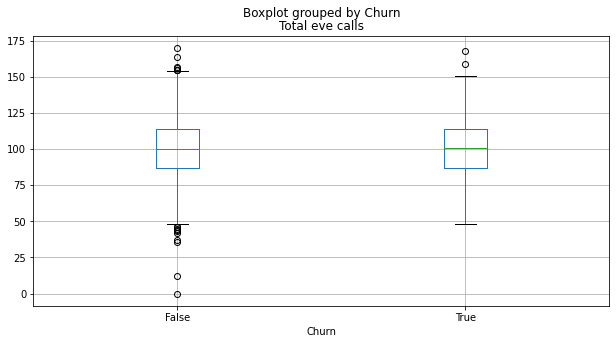

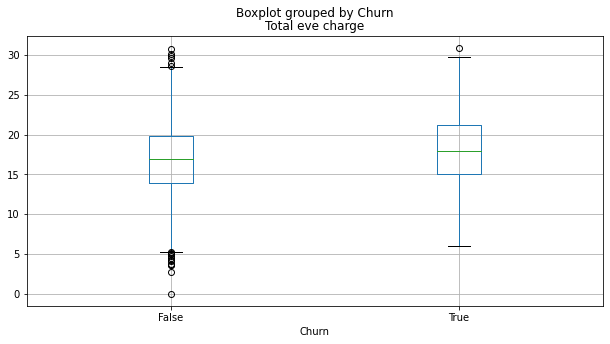

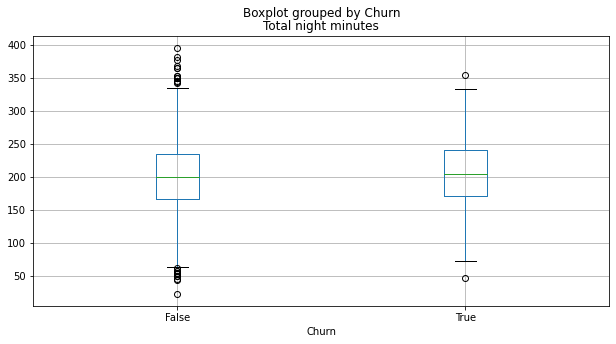

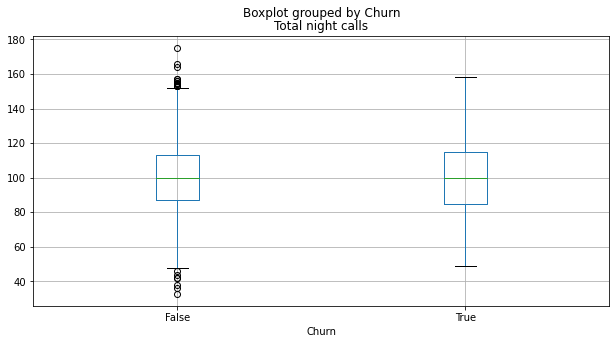

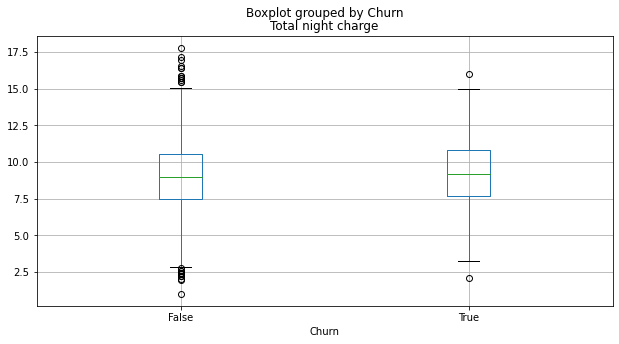

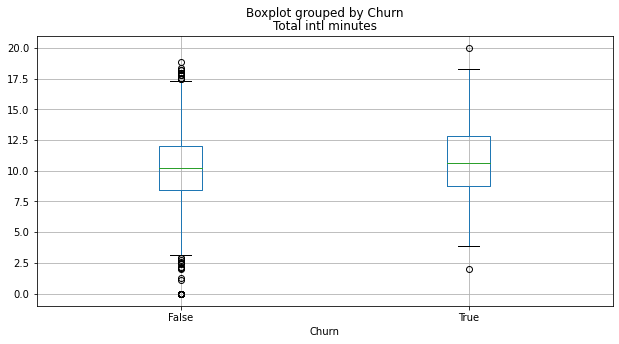

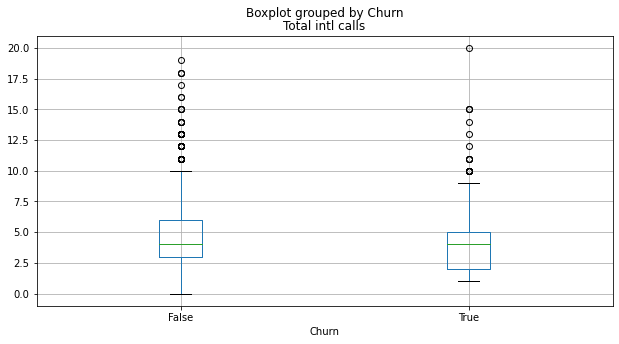

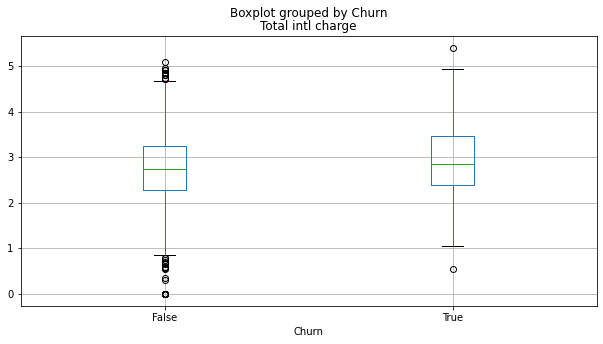

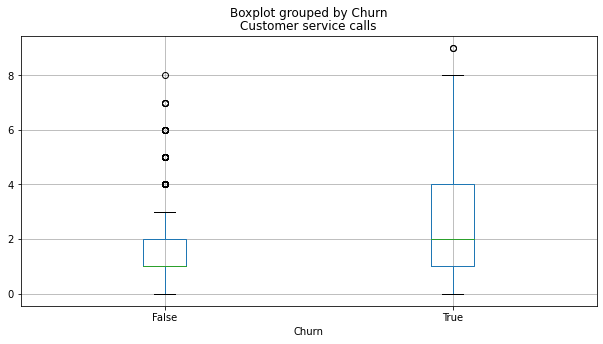

In [136]:
# Boxplot Analysis:
for feature in numeric_features:
    figure = plt.figure(figsize=(10,5))
    axis = plt.gca()
    df_.boxplot(column=[feature],grid =True, ax = axis, by = "Churn")

In [214]:
cat_features.columns

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [227]:
cat_features["Voice mail plan"].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [226]:
for feature in cat_features.columns:
    print(feature +" :\n", cat_features[feature].value_counts())
    

State :
 WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64
International plan :
 No     3010
Yes     323
Name: International plan, dtype: int64
Voice mail plan :
 No     2411
Yes     922
Name: Voice mail plan, dtype: int64


In [257]:
categories =df_["International plan"].unique()
freq =df_["International plan"].value_counts()


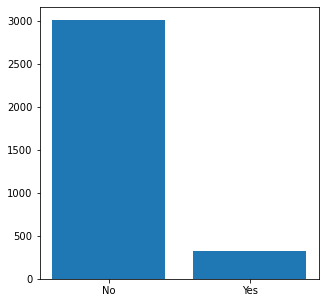

In [265]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
plt.bar(categories,freq)
plt.show()

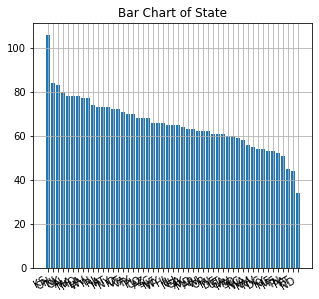

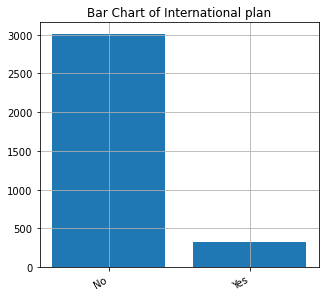

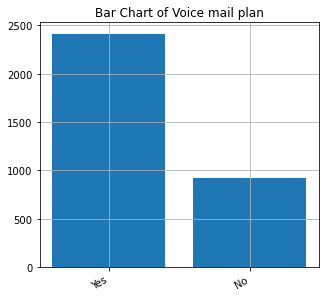

In [273]:
for feature in cat_features.columns:
    categories =df_[feature].unique()
    freq =df_[feature].value_counts()
    fig = plt.figure(figsize=(5,5))
    ax = plt.gca()
    plt.title("Bar Chart of " + feature)
    plt.grid()
    plt.bar(categories,freq)
    fig.autofmt_xdate()
    plt.show()
    